In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Load Data
cust = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/cohort_analysis/Customer.csv')
inv = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/cohort_analysis/invoice.csv')
users = pd.read_csv('/content/drive/MyDrive/DATA ANALISIS/cohort_analysis/users.csv', sep=';')

# Cek 5 data teratas masing-masing
print("--- Data Customer ---")
display(cust.head())
print("\n--- Data Invoice ---")
display(inv.head())
print("\n--- Data Users ---")
display(users.head())
users.dropna(subset=['user_id'], inplace=True)
# Cek tipe data (sangat penting untuk kolom tanggal!)
print("\n--- Info Data ---")
users.info()
inv.info()
cust.info()

--- Data Customer ---


,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33



--- Data Invoice ---


,Invoice,InvoiceDate,Customer ID
0,496349,2010-02-01,14739.0
1,496349,2010-02-01,14739.0
2,496349,2010-02-01,14739.0
3,496349,2010-02-01,14739.0
4,496349,2010-02-01,14739.0



--- Data Users ---


,user_id,signup_date
0,13074.0,2010-02-01
1,13156.0,2010-02-01
2,13173.0,2010-02-01
3,13206.0,2010-02-01
4,13259.0,2010-02-01



--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
Index: 3851 entries, 0 to 3850
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3851 non-null   float64
 1   signup_date  3851 non-null   object 
dtypes: float64(1), object(1)
memory usage: 90.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413752 entries, 0 to 413751
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      413752 non-null  object 
 1   InvoiceDate  413752 non-null  object 
 2   Customer ID  329825 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   IDPelanggan             200 non-null    int64 
 1   Kelamin          

In [ ]:
# 1. Hapus yang kosong
inv = inv.dropna(subset=['Customer ID'])
users = users.dropna(subset=['user_id'])

# 2. Ubah ID menjadi Integer (biar seragam)
inv['Customer ID'] = inv['Customer ID'].astype(int)
users['user_id'] = users['user_id'].astype(int)
# cust['IDPelanggan'] biasanya sudah int, tapi boleh dipastikan lagi:
cust['IDPelanggan'] = cust['IDPelanggan'].astype(int)

# 3. Ubah Tanggal menjadi Datetime
inv['InvoiceDate'] = pd.to_datetime(inv['InvoiceDate'])
users['signup_date'] = pd.to_datetime(users['signup_date'])

print("Pembersihan selesai! Sekarang tipe data sudah benar.")
# Cek tipe data (sangat penting untuk kolom tanggal!)
print("\n--- Info Data ---")
users.info()
inv.info()
cust.info()

Pembersihan selesai! Sekarang tipe data sudah benar.

--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
Index: 3851 entries, 0 to 3850
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      3851 non-null   int64         
 1   signup_date  3851 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 90.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 329825 entries, 0 to 413751
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      329825 non-null  object        
 1   InvoiceDate  329825 non-null  datetime64[ns]
 2   Customer ID  329825 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count 

In [ ]:
# 1. Gabungkan INVOICE dan USERS (Ini analisis utama, data tetap ribuan)
df_utama = pd.merge(inv, users, left_on='Customer ID', right_on='user_id', how='inner')

# 2. Gabungkan dengan CUSTOMER (Hanya untuk tambahan info profil)
# Gunakan how='left' agar data ribuan tadi tidak hilang,
# tapi kolom Usia/Kelamin akan berisi NaN untuk orang yang tidak ada di list 200 tadi.
df_profile = pd.merge(df_utama, cust, left_on='Customer ID', right_on='IDPelanggan', how='left')

# Melihat hasil gabungan pertama (Invoice + Users)
print("Tabel Utama (Ribuan Data):")
display(df_utama.head())

# Melihat hasil gabungan akhir (Sudah ada kolom Usia/Kelamin)
print("\nTabel Profile (Ada kolom NaN untuk user di luar 200 sampel):")
display(df_profile.head())

Tabel Utama (Ribuan Data):


,Invoice,InvoiceDate,Customer ID,user_id,signup_date
0,496349,2010-02-01,14739,14739,2010-02-01
1,496349,2010-02-01,14739,14739,2010-02-01
2,496349,2010-02-01,14739,14739,2010-02-01
3,496349,2010-02-01,14739,14739,2010-02-01
4,496349,2010-02-01,14739,14739,2010-02-01



Tabel Final (Ada kolom NaN untuk user di luar 200 sampel):


,Invoice,InvoiceDate,Customer ID,user_id,signup_date,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,496349,2010-02-01,14739,14739,2010-02-01,NaN,NaN,NaN,NaN,NaN
1,496349,2010-02-01,14739,14739,2010-02-01,NaN,NaN,NaN,NaN,NaN
2,496349,2010-02-01,14739,14739,2010-02-01,NaN,NaN,NaN,NaN,NaN
3,496349,2010-02-01,14739,14739,2010-02-01,NaN,NaN,NaN,NaN,NaN
4,496349,2010-02-01,14739,14739,2010-02-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_utama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329825 entries, 0 to 329824
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      329825 non-null  object        
 1   InvoiceDate  329825 non-null  datetime64[ns]
 2   Customer ID  329825 non-null  int64         
 3   user_id      329825 non-null  int64         
 4   signup_date  329825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 12.6+ MB


#  Time-based Cohort Analysis
Mengidentifikasi kapan pelanggan cenderung berhenti menggunakan layanan (churn) dan melihat apakah kualitas pelanggan yang didapat dari bulan ke bulan membaik atau justru menurun.

In [ ]:
# 1. Ambil tahun dan bulan saja untuk pendaftaran dan transaksi
df_utama['signup_month'] = df_utama['signup_date'].dt.to_period('M')
df_utama['invoice_month'] = df_utama['InvoiceDate'].dt.to_period('M')

# 2. Fungsi untuk menghitung selisih bulan
def get_month_diff(x):
    diff = (x['invoice_month'].year - x['signup_month'].year) * 12 + (x['invoice_month'].month - x['signup_month'].month)
    return diff

# 3. Terapkan fungsi ke dataframe
df_utama['cohort_index'] = df_utama.apply(get_month_diff, axis=1)

# Lihat hasilnya
display(df_utama[['Customer ID', 'signup_month', 'invoice_month', 'cohort_index']].head())

,Customer ID,signup_month,invoice_month,cohort_index
0,14739,2010-02,2010-02,0
1,14739,2010-02,2010-02,0
2,14739,2010-02,2010-02,0
3,14739,2010-02,2010-02,0
4,14739,2010-02,2010-02,0


In [ ]:
# 1. Hitung jumlah user unik untuk setiap bulan pendaftaran dan index-nya
cohort_counts = df_utama.groupby(['signup_month', 'cohort_index'])['Customer ID'].nunique().reset_index()

# 2. Buat Pivot Table
cohort_pivot = cohort_counts.pivot(index='signup_month', columns='cohort_index', values='Customer ID')

# 3. Hitung Persentase (Retention Rate)
# Kita bagi setiap angka di baris tersebut dengan angka di kolom pertama (bulan ke-0)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# Tampilkan tabel persentase
display(retention.round(3) * 100) # Dalam persen

cohort_index,0,1,2,3,4,5,6,7,8,9,10
signup_month,,,,,,,,,,,
2010-02,100.0,44.9,41.8,46.4,43.2,39.2,36.9,42.2,43.3,46.0,22.2
2010-03,100.0,30.8,33.0,31.9,30.1,28.1,32.3,38.9,40.3,15.8,NaN
2010-04,100.0,24.1,24.4,21.6,22.1,26.1,30.4,30.7,9.3,NaN,NaN
2010-05,100.0,21.9,20.1,20.7,19.4,28.5,27.0,10.7,NaN,NaN,NaN
2010-06,100.0,20.3,19.9,21.2,23.2,30.7,8.2,NaN,NaN,NaN,NaN
2010-07,100.0,21.4,20.8,29.2,28.6,13.0,NaN,NaN,NaN,NaN,NaN
2010-08,100.0,21.8,31.8,30.6,12.9,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,100.0,28.6,27.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10,100.0,27.4,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


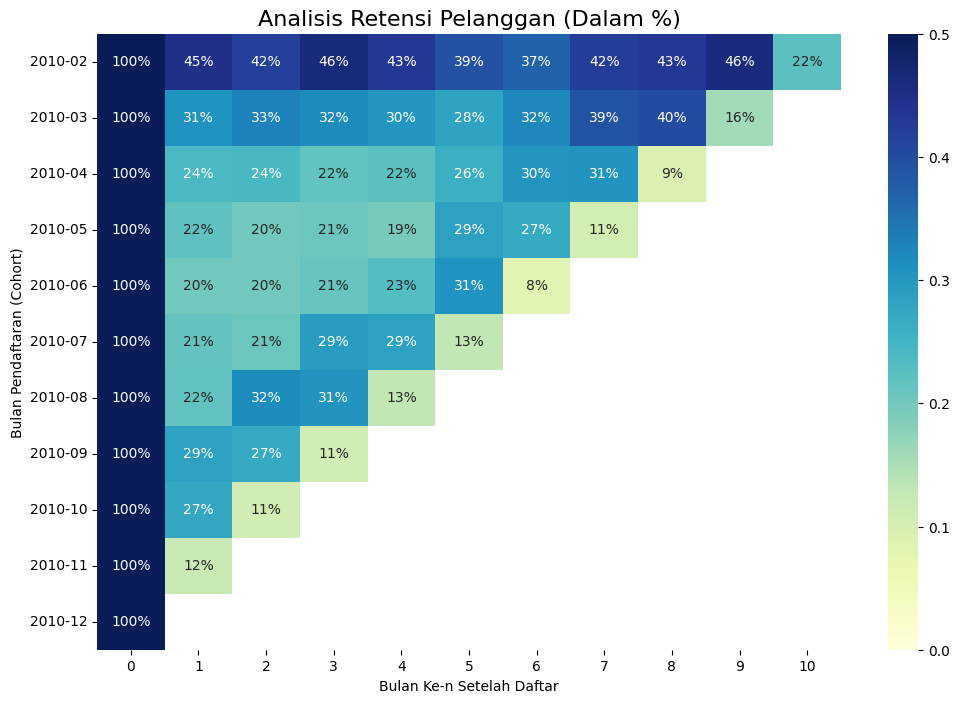

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.title('Analisis Retensi Pelanggan (Dalam %)', fontsize=16)

sns.heatmap(retention,
            annot=True,
            fmt='.0%',
            cmap='YlGnBu',
            vmin=0.0,
            vmax=0.5) # Warna maksimal diatur 50% supaya kontras

plt.xlabel('Bulan Ke-n Setelah Daftar')
plt.ylabel('Bulan Pendaftaran (Cohort)')
plt.show()

1. Tren Penurunan Retensi yang Drastis (The "First Month" Drop)
Ini adalah temuan paling mencolok. Hampir semua kelompok pelanggan (cohort) mengalami penurunan drastis tepat setelah bulan pertama (Kolom 1).

Insight: Perhatikan kolom 1. Retensi langsung turun dari 100% ke angka 12% - 45%.

Artinya: Bisnis kamu kehilangan sebagian besar pelanggan (sekitar 55% hingga 88%) hanya dalam waktu satu bulan. Kamu perlu strategi onboarding atau promo khusus di bulan kedua agar mereka tidak langsung "kabur".

2. Penurunan Kualitas Pelanggan Baru (Baris demi Baris)
Jika kita melihat kolom "1" secara vertikal dari atas ke bawah, angkanya cenderung menurun.

Februari (2010-02): Retensi bulan pertama adalah 45%.

November (2010-11): Retensi bulan pertama turun drastis menjadi hanya 12%.

Insight: Pelanggan yang didapat di akhir tahun (Oktober-November) jauh lebih tidak loyal dibandingkan pelanggan di awal tahun. Mungkin kampanye pemasaran di akhir tahun menarik orang yang hanya berburu diskon sekali pakai.

3. "The Sweet Spot" (Retensi Stabil di Bulan Ke-5)
Ada fenomena unik di mana retensi cenderung naik kembali atau stabil setelah bulan ke-5.

Contoh: Cohort 2010-02 stabil di kisaran 40% pada bulan ke-7 sampai ke-9. Begitu juga cohort 2010-06 yang naik ke 31% di bulan ke-5.

Insight: Pelanggan yang berhasil bertahan melewati bulan ke-4 biasanya menjadi pelanggan "loyal" yang konsisten berbelanja. Fokus bisnis harus diarahkan untuk menjaga pelanggan tetap aktif sampai melewati ambang bulan ke-5 ini.

4. Anomali Positif pada Cohort Februari
Cohort 2010-02 adalah kelompok yang paling "sehat" karena warnanya paling gelap dan stabil di angka yang tinggi (di atas 30% hampir sepanjang tahun).

Insight: Ada sesuatu yang benar dilakukan pada bulan Februari. Apakah ada peluncuran produk baru atau kualitas layanan yang lebih baik saat itu? Ini bisa dijadikan benchmark (acuan) untuk bulan-bulan lainnya.

Secara keseluruhan, bisnis memiliki tantangan besar dalam mempertahankan pelanggan baru di bulan pertama pendaftaran (churn rate tinggi). Namun, pelanggan yang berhasil dipertahankan hingga bulan ke-5 menunjukkan loyalitas yang sangat kuat. Rekomendasi utama adalah memperbaiki strategi komunikasi di 30 hari pertama setelah pendaftaran, terutama untuk pelanggan yang bergabung di kuartal terakhir tahun 2010.

# Cohort Berdasarkan Loyalitas
Berapa kali belanja di bulan pertama

In [ ]:
# 1. Hitung jumlah transaksi per user di bulan pertama mereka daftar (index 0)
bulan_pertama = df_utama[df_utama['cohort_index'] == 0]
jumlah_belanja = bulan_pertama.groupby('Customer ID')['Invoice'].nunique().reset_index()

# 2. Kasih label
def label_loyalitas(jumlah):
    return 'Antusias (>10 kali)' if jumlah > 1 else 'Coba-coba (1 kali)'

jumlah_belanja['tipe_pelanggan'] = jumlah_belanja['Invoice'].apply(label_loyalitas)

# 3. Masukkan kembali ke df_utama
df_utama = pd.merge(df_utama, jumlah_belanja[['Customer ID', 'tipe_pelanggan']], on='Customer ID', how='left')

# 4. Buat tabel retensi untuk masing-masing tipe
loyal_cohort = df_utama.groupby(['tipe_pelanggan', 'cohort_index'])['Customer ID'].nunique().reset_index()
loyal_pivot = loyal_cohort.pivot(index='tipe_pelanggan', columns='cohort_index', values='Customer ID')
loyal_retention = loyal_pivot.divide(loyal_pivot.iloc[:, 0], axis=0)

display(loyal_retention.style.format("{:.1%}"))

cohort_index,0,1,2,3,4,5,6,7,8,9,10
tipe_pelanggan,,,,,,,,,,,
Antusias (>10 kali),100.0%,40.6%,34.3%,32.6%,30.6%,27.0%,26.1%,27.4%,24.6%,16.9%,9.0%
Coba-coba (1 kali),100.0%,23.7%,22.1%,21.0%,18.6%,18.8%,16.7%,16.6%,14.0%,10.1%,2.8%


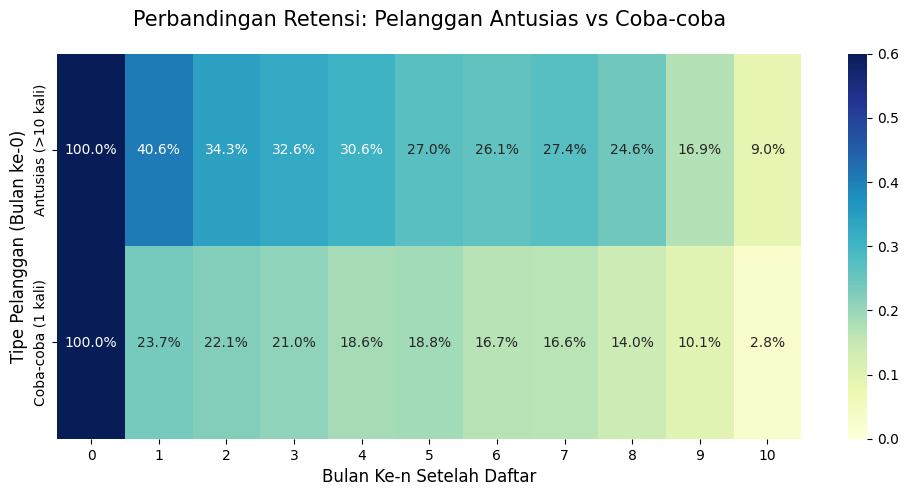

In [ ]:
# 1. Mengatur ukuran gambar
plt.figure(figsize=(12, 5))

# 2. Membuat Heatmap
sns.heatmap(loyal_retention,
            annot=True,          # Menampilkan angka persentase
            fmt='.1%',           # Format persentase dengan 1 desimal
            cmap='YlGnBu',       # Warna (Kuning-Hijau-Biru)
            vmin=0.0,
            vmax=0.6)            # Batas warna agar kontras (misal max 60%)

# 3. Menambah Label
plt.title('Perbandingan Retensi: Pelanggan Antusias vs Coba-coba', fontsize=15, pad=20)
plt.ylabel('Tipe Pelanggan (Bulan ke-0)', fontsize=12)
plt.xlabel('Bulan Ke-n Setelah Daftar', fontsize=12)

plt.show()

Grafik ini memberikan insight yang jauh lebih berharga untuk strategi marketing.

Pentingnya Transaksi Pertama yang Berulang: Perhatikan perbedaan warnanya. Kelompok Antusias (>1 kali) memiliki retensi yang jauh lebih stabil (biru lebih merata) dibandingkan kelompok Coba-coba.

Angka Retensi 2x Lipat: Di bulan pertama (kolom 1), kelompok Antusias bertahan 40.6%, sedangkan kelompok Coba-coba hanya 23.7%. Selisih ini bertahan terus sampai akhir tahun.

Insight Strategis (Golden Rule): Pelanggan yang belanja lebih dari sekali di bulan pendaftaran memiliki kemungkinan hampir 2 kali lebih besar untuk tetap menjadi pelanggan tetap di masa depan.

Kematian di Bulan ke-10: Kelompok Coba-coba hampir "punah" di bulan ke-10 (sisa 2.8%), sedangkan kelompok Antusias masih bertahan di angka 9%.